In [170]:
import matplotlib.pyplot as plt


class Situatie(object):
    
    def __init__(self,totaaljaren,
                 huurjaren,
                 leenjaren,
                 huur,
                 kostprijs_huis,
                 eigen_geld,
                 extra_lenen_van_ouders,
                 rentevoet,
                 inkomen,
                 levenskost):
        self.totaaljaren = totaaljaren
        self.huurjaren = huurjaren
        self.leenjaren = leenjaren
        self.huur = huur
        self.kostprijs_huis = kostprijs_huis
        self.eigen_geld = eigen_geld
        self.extra_lenen_van_ouders = extra_lenen_van_ouders
        self.rentevoet = rentevoet
        self.inkomen = inkomen
        self.levenskost = levenskost
        
    def huur_totaal(self):
        return self.huurjaren * 12 * self.huur
    
    def netto_inkomen(self):
        return self.inkomen - self.levenskost
    
    def gespaard_tijdens_huur_maand(self):
        return self.netto_inkomen() - self.huur
    
    def totaal_gespaard_na_huren(self):
        return self.huurjaren * 12 * self.gespaard_tijdens_huur_maand()
    
    def lening(self):
        return (self.kostprijs_huis 
                - self.totaal_gespaard_na_huren() 
                - self.eigen_geld 
                - self.extra_lenen_van_ouders)
    def lening_totaal(self):
        extra = 0
        bedrag = self.lening()
        for i in range(self.leenjaren):
            extra += bedrag * self.rentevoet
            bedrag -= self.lening()/self.leenjaren
        return self.lening() + extra
    
    def kost_per_maand_huis(self):
        return self.lening_totaal() / self.leenjaren / 12
    
    def gespaard_tijdens_huis_maand(self):
        return (self.netto_inkomen() - self.kost_per_maand_huis())
    
    def gespaard_tijdens_huis_totaal(self):
        return self.gespaard_tijdens_huis_maand() * 12 * self.leenjaren
    
    def totale_kost(self):
        return (self.huur_totaal() 
                + self.lening_totaal()
                + self.eigen_geld
                + self.extra_lenen_van_ouders)
    
    def kosteloze_jaren(self):
        return self.totaaljaren - self.huurjaren - self.leenjaren
    
    def gespaard_na_afbetaling_huis_totaal(self):
        return self.kosteloze_jaren() * 12 * self.netto_inkomen()
    
    def gespaard_totaal(self):
        return (self.gespaard_tijdens_huis_totaal()
                + self.gespaard_na_afbetaling_huis_totaal()
                - self.eigen_geld
                - self.extra_lenen_van_ouders)
    
    def bankrekening_evolutie(self):
        
        xs = []
        bankrekening = self.eigen_geld
        for i in range(self.huurjaren):
            bankrekening += self.gespaard_tijdens_huur_maand() * 12
            xs.append(bankrekening)
        
        bankrekening -= self.totaal_gespaard_na_huren()
        bankrekening -= self.eigen_geld 
        bankrekening -= self.extra_lenen_van_ouders
        
        for i in range(self.leenjaren):
            bankrekening += self.gespaard_tijdens_huis_maand() * 12
            xs.append(bankrekening)
                
        for i in range(self.kosteloze_jaren()):
            bankrekening += self.netto_inkomen() * 12
            xs.append(bankrekening)
        return xs
    
    def info(self):
        return 'eindtotaal: %i, %i per maand' % (int(self.gespaard_totaal()), int(self.kost_per_maand_huis()))


def standaard_situatie():
    return Situatie(totaaljaren=25,
             huurjaren=2,
             leenjaren=20,
             huur = 550,
             kostprijs_huis = 400000,
             eigen_geld = 20000,
             extra_lenen_van_ouders = 50000,
             rentevoet = 0.024,
             inkomen = 4300,
             levenskost = 1000)

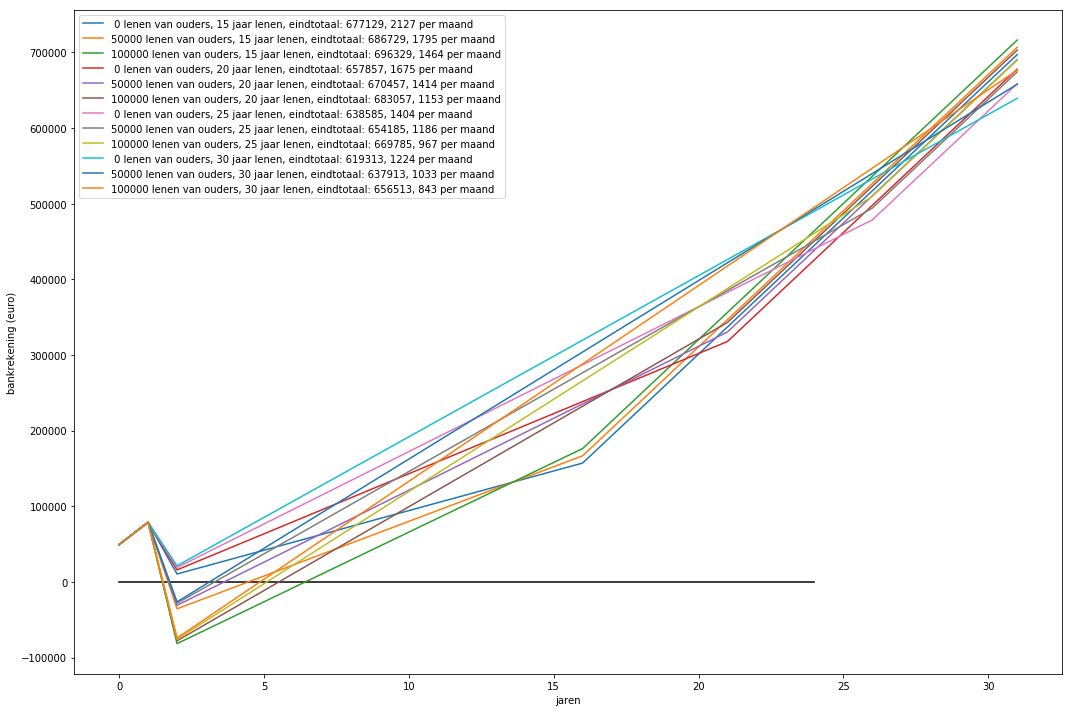

In [136]:
s = standaard_situatie()
plt.figure(figsize=(15,10))
plt.plot([0 for _ in range(s.totaaljaren)],color='black')
s.totaaljaren = 32

s.leenjaren = 15
s.extra_lenen_van_ouders = 0
label = ' 0 lenen van ouders, 15 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.extra_lenen_van_ouders = 50000
label = '50000 lenen van ouders, 15 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.extra_lenen_van_ouders = 100000
label = '100000 lenen van ouders, 15 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
plt.legend()
plt.xlabel("jaren")
plt.ylabel("bankrekening (euro)")
plt.tight_layout()

s.leenjaren = 20
s.extra_lenen_van_ouders = 0
label = ' 0 lenen van ouders, 20 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.extra_lenen_van_ouders = 50000
label = '50000 lenen van ouders, 20 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.extra_lenen_van_ouders = 100000
label = '100000 lenen van ouders, 20 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())

s.leenjaren = 25
s.extra_lenen_van_ouders = 0
label = ' 0 lenen van ouders, 25 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.extra_lenen_van_ouders = 50000
label = '50000 lenen van ouders, 25 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.extra_lenen_van_ouders = 100000
label = '100000 lenen van ouders, 25 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
plt.legend()
plt.xlabel("jaren")
plt.ylabel("bankrekening (euro)")
plt.tight_layout()

s.leenjaren = 30
s.extra_lenen_van_ouders = 0
label = ' 0 lenen van ouders, 30 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.extra_lenen_van_ouders = 50000
label = '50000 lenen van ouders, 30 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.extra_lenen_van_ouders = 100000
label = '100000 lenen van ouders, 30 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
plt.legend()
plt.xlabel("jaren")
plt.ylabel("bankrekening (euro)")
plt.tight_layout()
plt.show()

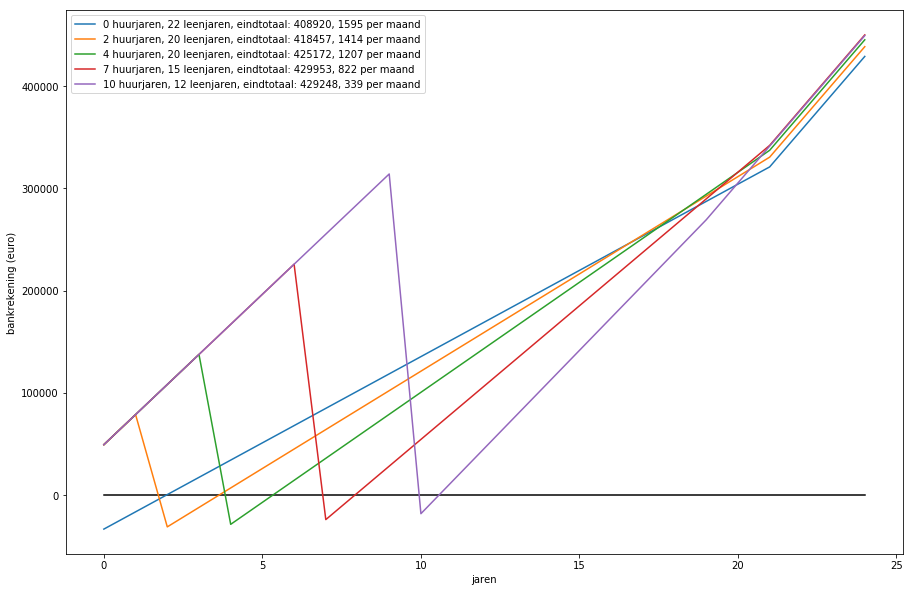

In [142]:
s = standaard_situatie()
plt.figure(figsize=(15,10))
s.huur = 550
plt.plot([0 for _ in range(s.totaaljaren)],color='black')
s.huurjaren = 0
s.leenjaren = 22
label = '0 huurjaren, 22 leenjaren'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.huurjaren = 2
s.leenjaren = 20
label = '2 huurjaren, 20 leenjaren'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.huurjaren = 4
s.leenjaren = 18
label = '4 huurjaren, 20 leenjaren'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.huurjaren = 7
s.leenjaren = 15
label = '7 huurjaren, 15 leenjaren'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.huurjaren = 10
s.leenjaren = 10
label = '10 huurjaren, 12 leenjaren'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
plt.legend()
plt.xlabel("jaren")
plt.ylabel("bankrekening (euro)")
plt.show()

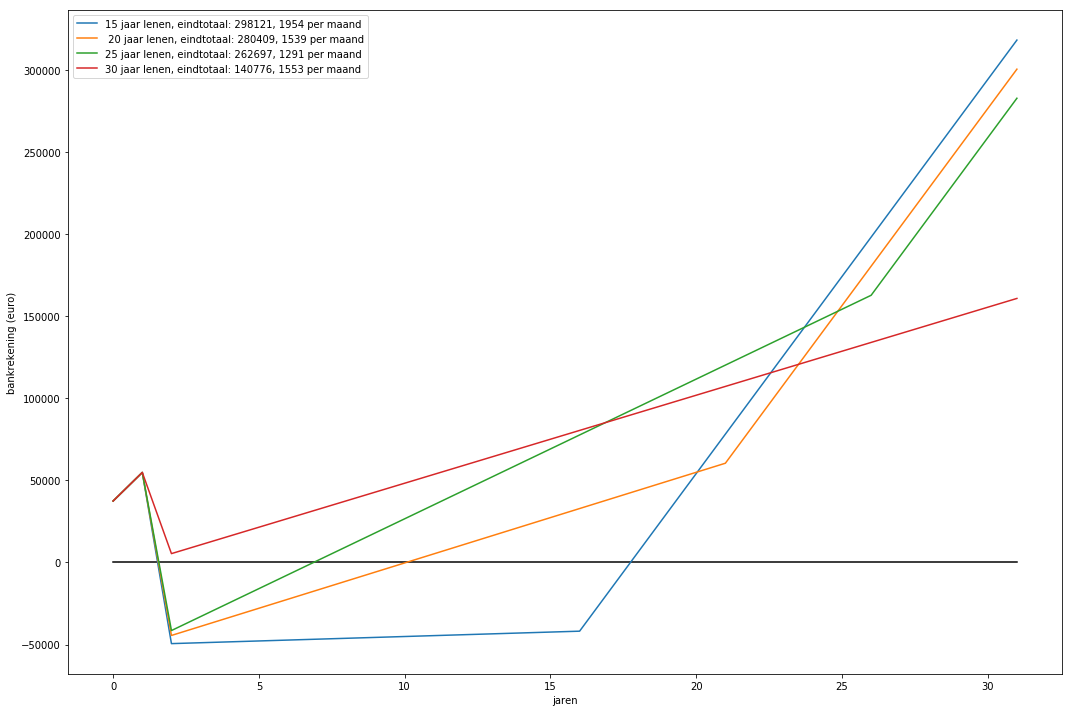

In [156]:
s = standaard_situatie()
plt.figure(figsize=(15,10))
s.levenskost = 2000
s.totaaljaren = 32
plt.plot([0 for _ in range(s.totaaljaren)],color='black')
s.leenjaren = 15
label = '15 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.leenjaren = 20
label = ' 20 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.leenjaren = 25
label = '25 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.leenjaren = 30
s.extra_lenen_van_ouders = 0
s.rentevoet = 0.04
label = '30 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
plt.legend()
plt.xlabel("jaren")
plt.ylabel("bankrekening (euro)")
plt.tight_layout()
plt.show()

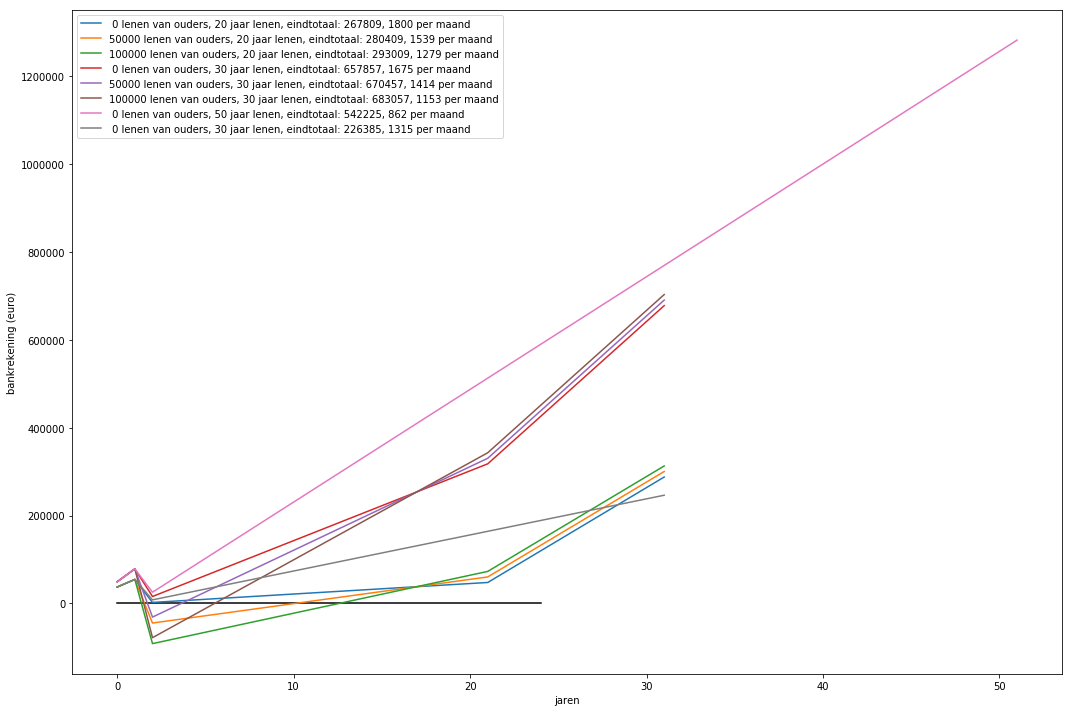

In [154]:
s = standaard_situatie()
plt.figure(figsize=(15,10))
plt.plot([0 for _ in range(s.totaaljaren)],color='black')
s.totaaljaren = 32
s.leenjaren = 20
s.levenskost = 2000
s.extra_lenen_van_ouders = 0
label = ' 0 lenen van ouders, 20 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.extra_lenen_van_ouders = 50000
label = '50000 lenen van ouders, 20 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.extra_lenen_van_ouders = 100000
label = '100000 lenen van ouders, 20 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())

s.levenskost = 1000
s.extra_lenen_van_ouders = 0
label = ' 0 lenen van ouders, 30 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.extra_lenen_van_ouders = 50000
label = '50000 lenen van ouders, 30 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.extra_lenen_van_ouders = 100000
label = '100000 lenen van ouders, 30 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())


s.levenskost = 1000
s.extra_lenen_van_ouders = 0
s.leenjaren = 50
label = ' 0 lenen van ouders, 50 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())

s.levenskost = 2000
s.extra_lenen_van_ouders = 0
s.leenjaren = 30
label = ' 0 lenen van ouders, 30 jaar lenen'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())

plt.legend()
plt.xlabel("jaren")
plt.ylabel("bankrekening (euro)")
plt.tight_layout()
plt.show()

261200
211200


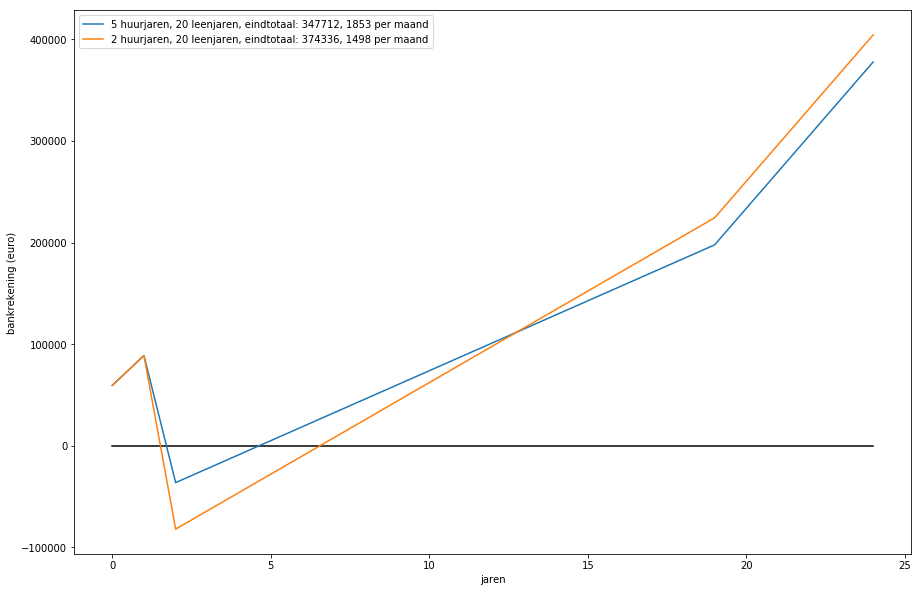

In [90]:
s = standaard_situatie()
plt.figure(figsize=(15,10))
plt.plot([0 for _ in range(s.totaaljaren)],color='black')
s.huurjaren = 2
s.leenjaren = 18
print(s.lening())
label = '5 huurjaren, 20 leenjaren'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.huurjaren = 2
s.leenjaren = 18
s.extra_lenen_van_ouders = 100000
print(s.lening())
label = '2 huurjaren, 20 leenjaren'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
plt.legend()
plt.xlabel("jaren")
plt.ylabel("bankrekening (euro)")
plt.show()

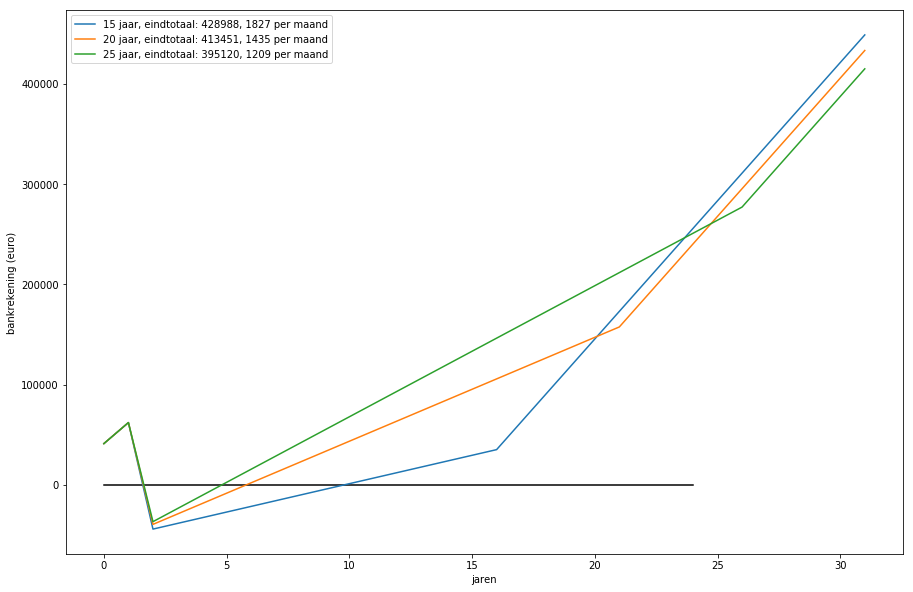

In [176]:
s = standaard_situatie()
plt.figure(figsize=(15,10))
plt.plot([0 for _ in range(s.totaaljaren)],color='black')
s.totaaljaren = 32

s.extra_lenen_van_ouders = 50000
# KEYTRADE
s.levenskost = 2000
s.rentevoet = 0.0178
s.leenjaren = 15
label = '15 jaar'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.rentevoet = 0.0187
s.leenjaren = 20
label = '20 jaar'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
s.rentevoet = 0.02
s.leenjaren = 25
label = '25 jaar'
plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
#s.rentevoet = 0.03
#s.leenjaren = 30
#label = '30 jaar'
#plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())
plt.legend()
plt.xlabel("jaren")
plt.ylabel("bankrekening (euro)")
plt.show()